In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_regression

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
test.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [4]:
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train.shape, test.shape


((1460, 81), (1459, 80))

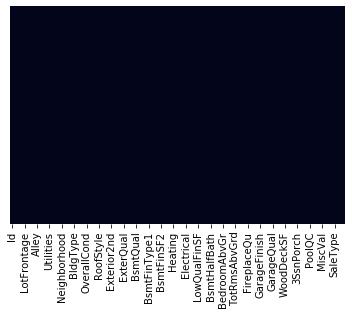

In [25]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False) 


In [11]:
train.isna().sum().sort_values()[-19:-1],
test.isna().sum().sort_values()[-33:-1]

GarageCars         1
GarageArea         1
KitchenQual        1
Exterior1st        1
SaleType           1
TotalBsmtSF        1
BsmtUnfSF          1
Exterior2nd        1
BsmtFinSF1         1
BsmtFinSF2         1
BsmtFullBath       2
Functional         2
Utilities          2
BsmtHalfBath       2
MSZoning           4
MasVnrArea        15
MasVnrType        16
BsmtFinType2      42
BsmtFinType1      42
BsmtExposure      44
BsmtQual          44
BsmtCond          45
GarageType        76
GarageFinish      78
GarageYrBlt       78
GarageQual        78
GarageCond        78
LotFrontage      227
FireplaceQu      730
Fence           1169
Alley           1352
MiscFeature     1408
dtype: int64

In [3]:
for col in ['Alley','FireplaceQu','Fence','MiscFeature','PoolQC']:
    train[col].fillna('NA', inplace=True)
    test[col].fillna('NA', inplace=True)

In [4]:
train['LotFrontage'].fillna(train["LotFrontage"].value_counts().to_frame().index[0], inplace=True)
test['LotFrontage'].fillna(test["LotFrontage"].value_counts().to_frame().index[0], inplace=True)

In [14]:
train[['GarageQual','GarageFinish','GarageYrBlt','GarageType','GarageCond']].isna().head(7)

,GarageQual,GarageFinish,GarageYrBlt,GarageType,GarageCond
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False
6,False,False,False,False,False


In [5]:
for col in ['GarageQual','GarageFinish','GarageYrBlt','GarageType','GarageCond']:
    train[col].fillna('NA',inplace=True)
    test[col].fillna('NA',inplace=True)

In [6]:
for col in ['BsmtQual','BsmtCond','BsmtFinType1','BsmtFinType2','BsmtExposure']:
    train[col].fillna('NA',inplace=True)
    test[col].fillna('NA',inplace=True)

In [7]:
train['Electrical'].fillna('SBrkr',inplace=True)

In [8]:
missings = ['GarageCars','GarageArea','KitchenQual','Exterior1st','SaleType','TotalBsmtSF','BsmtUnfSF','Exterior2nd',
            'BsmtFinSF1','BsmtFinSF2','BsmtFullBath','Functional','Utilities','BsmtHalfBath','MSZoning']
train[missings].head()

,GarageCars,GarageArea,KitchenQual,Exterior1st,SaleType,TotalBsmtSF,BsmtUnfSF,Exterior2nd,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,Functional,Utilities,BsmtHalfBath,MSZoning
0,2,548,Gd,VinylSd,WD,856,150,VinylSd,706,0,1,Typ,AllPub,0,RL
1,2,460,TA,MetalSd,WD,1262,284,MetalSd,978,0,0,Typ,AllPub,1,RL
2,2,608,Gd,VinylSd,WD,920,434,VinylSd,486,0,1,Typ,AllPub,0,RL
3,3,642,Gd,Wd Sdng,WD,756,540,Wd Shng,216,0,1,Typ,AllPub,0,RL
4,3,836,Gd,VinylSd,WD,1145,490,VinylSd,655,0,1,Typ,AllPub,0,RL


In [8]:
numerical=['GarageCars','GarageArea','TotalBsmtSF','BsmtUnfSF','BsmtFinSF1','BsmtFinSF2','BsmtFullBath','BsmtHalfBath']
categorical = ['KitchenQual','Exterior1st','SaleType','Exterior2nd','Functional','Utilities','MSZoning']

In [9]:
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy='median',axis=0)
imputer.fit(test[numerical] + train[numerical])
test[numerical] = imputer.transform(test[numerical])
train[numerical] = imputer.transform(train[numerical])

C:\Users\asus\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [10]:
for i in categorical:
    train[i].fillna(train[i].value_counts().to_frame().index[0], inplace=True)
    test[i].fillna(test[i].value_counts().to_frame().index[0], inplace=True)   

In [12]:
print(train[train['MasVnrType']=='None']['SalePrice'].median())
print(train[train['MasVnrType']=='BrkFace']['SalePrice'].median())
print(train[train['MasVnrType']=='Stone']['SalePrice'].median())
print(train[train['MasVnrType']=='BrkCmn']['SalePrice'].median())


143000.0
181000.0
246839.0
139000.0


In [11]:
train['MasVnrArea'].fillna(181000,inplace=True)
test['MasVnrArea'].fillna(181000,inplace=True)

train['MasVnrType'].fillna('NA',inplace=True)
test['MasVnrType'].fillna('NA',inplace=True)

In [12]:
y = train['SalePrice']

In [27]:
train.shape

(1460, 81)

In [13]:
x=train.drop(['SalePrice'],axis=1)

In [34]:
x.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NA,Reg,Lvl,AllPub,...,0,0,NA,NA,NA,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NA,Reg,Lvl,AllPub,...,0,0,NA,NA,NA,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NA,IR1,Lvl,AllPub,...,0,0,NA,NA,NA,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NA,IR1,Lvl,AllPub,...,0,0,NA,NA,NA,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NA,IR1,Lvl,AllPub,...,0,0,NA,NA,NA,0,12,2008,WD,Normal


In [30]:
test.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NA,Reg,Lvl,AllPub,...,120,0,NA,MnPrv,NA,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NA,IR1,Lvl,AllPub,...,0,0,NA,NA,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NA,IR1,Lvl,AllPub,...,0,0,NA,MnPrv,NA,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NA,IR1,Lvl,AllPub,...,0,0,NA,NA,NA,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NA,IR1,HLS,AllPub,...,144,0,NA,NA,NA,0,1,2010,WD,Normal


In [14]:
from sklearn.model_selection import train_test_split


In [15]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(1022, 80) (1022,)
(438, 80) (438,)


In [16]:
X_train2=pd.get_dummies(X_train)
X_train2.head(10)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1216,1217,90,68.0,8930,6,5,1978,1978,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0
796,797,20,71.0,8197,6,5,1977,1977,148.0,0.0,...,0,0,0,1,0,0,0,0,1,0
799,800,50,60.0,7200,5,7,1937,1950,252.0,569.0,...,0,0,0,1,0,0,0,0,1,0
225,226,160,21.0,1680,5,5,1971,1971,142.0,0.0,...,0,0,0,0,1,0,0,0,0,0
1357,1358,20,60.0,12537,5,6,1971,2008,0.0,734.0,...,0,0,0,1,0,0,0,0,1,0
121,122,50,50.0,6060,4,5,1939,1950,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0
396,397,20,60.0,7200,5,5,1972,1972,0.0,777.0,...,0,0,0,1,0,0,0,0,1,0
1009,1010,50,60.0,6000,5,5,1926,1950,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1200,1201,20,71.0,9353,4,5,1970,1970,0.0,0.0,...,0,0,1,0,1,0,0,0,0,0
678,679,20,80.0,11844,8,5,2008,2008,464.0,0.0,...,0,1,0,0,0,0,0,0,0,1


In [17]:
X_test2=pd.get_dummies(X_test)
X_test2.head(10)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1088,1089,160,24.0,2522,7,5,2004,2004,50.0,0.0,...,0,0,0,0,1,0,0,0,1,0
151,152,20,107.0,13891,8,5,2007,2008,436.0,1400.0,...,0,0,1,0,0,0,0,0,0,1
444,445,60,70.0,8750,7,5,1994,1995,0.0,642.0,...,0,0,0,0,1,0,0,0,1,0
270,271,60,84.0,10728,8,5,2006,2006,0.0,0.0,...,0,0,1,0,0,0,0,0,0,1
407,408,70,63.0,15576,6,7,1915,1976,0.0,0.0,...,0,0,0,0,1,0,0,0,1,0
778,779,90,60.0,8400,5,5,1977,1977,320.0,0.0,...,0,0,0,0,1,0,0,0,1,0
1046,1047,60,85.0,16056,9,5,2005,2006,208.0,240.0,...,0,0,1,0,0,0,0,0,0,1
114,115,70,61.0,7259,6,8,1945,2002,0.0,774.0,...,0,0,0,0,1,0,0,0,1,0
846,847,60,75.0,9317,7,5,1993,1993,137.0,513.0,...,0,0,0,0,1,0,0,0,1,0
965,966,60,65.0,10237,6,5,2005,2007,0.0,0.0,...,0,0,1,0,0,0,0,0,0,1


In [18]:
testcolumns = X_test2.columns 
traincolumns = X_train2.columns

In [19]:
allcolumns = traincolumns.union(testcolumns) 
len(allcolumns)

401

In [20]:
trainaddcolumns = allcolumns.difference(traincolumns)
testaddcolumns = allcolumns.difference(testcolumns)

In [21]:
testcopy = X_test2


In [22]:
X_test2 = pd.concat([testcopy , testcopy.reindex(columns = testaddcolumns, fill_value = 0)], axis = 1)

In [23]:
trainXcopy = X_train2
X_train2 = pd.concat([trainXcopy , trainXcopy.reindex(columns = trainaddcolumns, fill_value = 0)], axis = 1)

In [64]:
X_test2.head(5)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,MiscFeature_TenC,Neighborhood_Blueste,PoolQC_Gd,RoofMatl_ClyTile,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_WdShngl,RoofStyle_Shed,Utilities_NoSeWa
645,646,20,60.0,10530,6,5,1971,1971,0.0,282.0,...,0,0,0,0,0,0,0,0,0,0
9,10,190,50.0,7420,5,6,1939,1950,0.0,851.0,...,0,0,0,0,0,0,0,0,0,0
1348,1349,20,60.0,16196,7,5,1998,1998,0.0,1443.0,...,0,0,0,0,0,0,0,0,0,0
93,94,190,60.0,7200,6,6,1910,1998,0.0,1046.0,...,0,0,0,0,0,0,0,0,0,0
554,555,60,85.0,10625,7,5,2003,2004,292.0,866.0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
full_model_data=pd.concat([X_train2, y_train],axis=1)

In [40]:
full_model_data.head(5)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,Exterior2nd_CBlock,GarageYrBlt_1900.0,GarageYrBlt_1906.0,GarageYrBlt_1933.0,RoofMatl_ClyTile,RoofMatl_Metal,RoofMatl_Roll,SaleCondition_AdjLand,Utilities_NoSeWa,SalePrice
1231,1232,90,70.0,7728,5,6,1962,1962,120.0,803.0,...,0,0,0,0,0,0,0,0,0,132500
112,113,60,77.0,9965,7,5,2007,2007,220.0,984.0,...,0,0,0,0,0,0,0,0,0,383970
247,248,20,75.0,11310,6,5,1954,1954,0.0,0.0,...,0,0,0,0,0,0,0,0,0,140000
1383,1384,30,60.0,25339,5,7,1918,2007,0.0,0.0,...,0,0,0,0,0,0,0,0,0,112000
225,226,160,21.0,1680,5,5,1971,1971,142.0,0.0,...,0,0,0,0,0,0,0,0,0,112000


In [24]:
from sklearn import linear_model

In [25]:
model = linear_model.LinearRegression()
model = model.fit(X_train2, y_train)
train_predictions = model.predict(X_train2)
test_predictions = model.predict(X_test2)

In [64]:
test_pred2=pd.DataFrame(test_predictions)

In [65]:
submission2=pd.concat([x_test3,test_pred2],axis=1)

In [66]:
submission2.to_excel (r'C:\Users\asus\Desktop\submission2.xlsx', index = None, header=True)

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics.scorer import make_scorer
%matplotlib inline

In [41]:
full_model_data.to_excel (r'C:\Users\asus\Desktop\export_dataframe.xlsx', index = None, header=True)

In [26]:
x_train3=X_train2.loc[:,['OverallQual','OverallCond',
'MasVnrArea',
'BsmtFinSF1',
'BsmtUnfSF',
'Neighborhood_StoneBr',
'Condition2_PosN',
'RoofMatl_CompShg',
'ExterQual_Ex',
'BsmtExposure_Gd']]

In [27]:
x_test3=X_test2.loc[:,['OverallQual','OverallCond',
'MasVnrArea',
'BsmtFinSF1',
'BsmtUnfSF',
'Neighborhood_StoneBr',
'Condition2_PosN',
'RoofMatl_CompShg',
'ExterQual_Ex',
'BsmtExposure_Gd']]

In [58]:
model2 = linear_model.LinearRegression()
model2 = model.fit(x_train3, y_train)
train_predictions = model.predict(x_train3)
test_predictions = model.predict(x_test3)

In [59]:
from sklearn.metrics import mean_squared_error 

In [60]:
mean_squared_error(y_test,test_predictions)

2605520510.3067317

In [69]:
test2.head(5)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,0,0,0,1,0,0,0,0,1,0
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,0,0,0,1,0,0,0,0,1,0
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,0,0,0,1,0,0,0,0,1,0
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,...,0,0,0,1,0,0,0,0,1,0
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,...,0,0,0,1,0,0,0,0,1,0


In [68]:
test2=pd.get_dummies(test)

In [71]:
test3=test2.loc[:,['Id','OverallQual','OverallCond',
'MasVnrArea',
'BsmtFinSF1',
'BsmtUnfSF',
'Neighborhood_StoneBr',
'Condition2_PosN',
'RoofMatl_CompShg',
'ExterQual_Ex',
'BsmtExposure_Gd']]

In [72]:
test_predictionsreal = model.predict(test3)

In [74]:
test_predsreal=pd.DataFrame(test_predictionsreal)

In [75]:
submission3=pd.concat([test3,test_predsreal],axis=1)

In [76]:
submission3.to_excel (r'C:\Users\asus\Desktop\submission3.xlsx', index = None, header=True)